# Taller 1 Problemas de ordenamiento

<h2>Merge Sort</h2>

<h2>Problema de ordenamiento</h2>

<p>El input y el output de ambos ordenamientos en el mismo.</p>

Input:  $A[1..n] = <a_1,a_2\ldots, a_n>$

<p>Se inicia con un arreglo de n pocisiones</p>

Output: $A'[1..n] = <a'_1,a'_2\ldots, a'_n> : a'_1\leq a'_2 \leq \ldots \leq  a'_n$

<p>Se inicia con un arreglo ordenado de n pocisiones</p>

<h2>Ordenamiento por el algoritmo de mergeSort</h2>

In [1]:
import math
import time
import matplotlib.pyplot as plt
from itertools import chain
import random as rnd
import numpy as np
import pylab as pl
import time as tm
%matplotlib inline

In [2]:
def mergeSort(A):
    temp = []
    if len(A) < 2:
        return A
    else:
        mid = int(len(A) / 2)
        IZQ = mergeSort(A[:mid])
        DER = mergeSort(A[mid:])
        i = 0
        j = 0
        while i < len(IZQ) and j < len(DER):
            if IZQ[i] > DER[j]:
                temp.append(DER[j])
                j = j + 1
            else:
                temp.append(IZQ[i])
                i = i + 1
        temp += IZQ[i:]
        temp += DER[j:]
    return temp


In [3]:
A = [5,9,6,1,8,4,2,3,7]
print (mergeSort(A))
B = np.random.permutation(range(0,10))
C= B.tolist()
print(C)
print (mergeSort(C))

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[4, 2, 8, 0, 7, 3, 1, 9, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


<h3>Correctitud<h3>
<p>Definición de la invariente</p>
<b>Invariante:</b><p>Para un arreglo temporal temp en la iteración k suponiendo dos subindices recorriendo el arreglo inicial A (i y j) se dice que temp[k] menor igual a[x] tal que x pertenece {i+1 ... m} y temp[k] mayor igual que a[x] tal que x pertenece a {j .. q}. es decir que el elemento k es el minimo de los elementos restantes, todos los elementos por debajo de k estan ordenados.</p>

In [4]:
def invarianteMergeSort(A, i):
    if(i < len(A)):
        while i < len(A)-1:
            if(A[i] < A[i+1]):
                i = i + 1
            else:
                return False
    return True

In [5]:
print (invarianteMergeSort([1, 2, 3, 4], 2))
print (invarianteMergeSort( [5, 3, 2, 1], 2))

True
False


<p>Verificación de la invariante</p>
<b>Invariante:</b>Se verifica que para la clase que esta implementada la invariante sera correcta por tanto se puede observar con el ejemplo anterior.

In [6]:
def right_mergeSort(A):
    temp = []
    
    if len(A) < 2:
        return A
    else:
        mid = int(len(A) / 2)
        IZQ = mergeSort(A[:mid])
        DER = mergeSort(A[mid:])
        assert invarianteMergeSort(IZQ, 0)
        i = 0
        j = 0
        while i < len(IZQ) and j < len(DER):
            if IZQ[i] > DER[j]:
                temp.append(DER[j])
                j = j + 1
            else:
                temp.append(IZQ[i])
                i = i + 1
        temp += IZQ[i:]
        temp += DER[j:]
    assert invarianteMergeSort(temp, 0)
    return temp

In [7]:
print (right_mergeSort([1, 4, 3, 2]))

[1, 2, 3, 4]


<p>La invariante verifico la correctiud </p>

In [8]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print ("Number of steps =", self.steps)
        
def acct_mergeSort(A, acct):
    temp = [];acct.count()
    if len(A) < 2:
        acct.count()
        return A;acct.count()
    else:
        acct.count()
        mid = int(len(A) / 2);acct.count()
        IZQ = mergeSort(A[:mid]);
        DER = mergeSort(A[mid:]);
        i = 0;acct.count()
        j = 0;acct.count()
        while i < len(IZQ) and j < len(DER):
            acct.count()
            if IZQ[i] > DER[j]:
                acct.count()
                temp.append(DER[j]);acct.count()
                j = j + 1;acct.count()
            else:
                temp.append(IZQ[i]);acct.count()
                i = i + 1;acct.count()
        temp += IZQ[i:];acct.count()
        temp += DER[j:];acct.count()

In [9]:
B = np.random.permutation(range(0,10))
acct = Counter()
C= B.tolist()
acct_mergeSort(C, acct)
acct.print_steps()


Number of steps = 39


In [10]:
def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        B = np.random.permutation(range(0,i))
        C= B.tolist()
        acct.reset()
        acct_mergeSort(C, acct)
        results.append(acct.steps)
    return results

In [11]:
print (exper_analysis(10))

[2, 2, 10, 10, 15, 21, 24, 20, 23, 36]


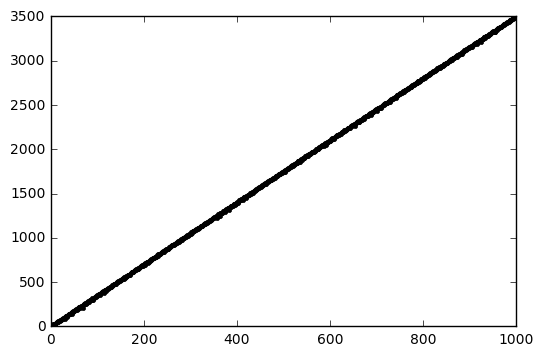

In [12]:
pl.clf()
x = np.arange(1000)
y = np.array(exper_analysis(1000))
pl.plot(x, y, 'k.')

<p>La grafica anterior es para el numero de pasos que marcan.</p>

In [13]:
def tiempo_mergeSort(n):
    results = []
    acct = Counter()
    for i in range(n):
        tic= time.clock()
        B = np.random.permutation(range(0,i))
        C= B.tolist()
        acct.reset()
        acct_mergeSort(C, acct)
        toc= time.clock()
        tiempo= toc-tic
        results.append(tiempo)
    return results

In [14]:
print (tiempo_mergeSort(10))

[7.200000000029405e-05, 0.00017500000000048033, 0.00017999999999940286, 0.00012200000000017752, 0.00013199999999979894, 0.0001299999999995194, 0.000140000000000029, 0.00011699999999947863, 0.00017900000000015126, 0.00020700000000051233]


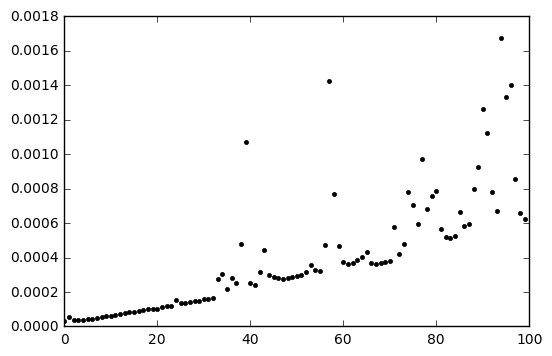

In [15]:
pl.clf()
x = np.arange(100)
y = np.array(tiempo_mergeSort(100))
pl.plot(x, y, 'k.')

<h2>Quick sort</h2>

<h2>Problema de ordenamiento</h2>

Input:  $A[1..n] = <a_1,a_2\ldots, a_n>$

<p>Se inicia con un arreglo de n pocisiones</p>

Output: $A'[1..n] = <a'_1,a'_2\ldots, a'_n> : a'_1\leq a'_2 \leq \ldots \leq  a'_n$

<p>Se inicia con un arreglo ordenado de n pocisiones</p>

In [16]:
def quicksort(A, i, f):
    if i < f:
        pivote = partition(A, i, f)
        quicksort(A, i, pivote-1)
        quicksort(A, pivote+1, f)
    return A

In [17]:
def partition(A, i, f):
    pivote = A[i]
    izq = i+1
    der = f
    bandera = True
    while  bandera:
        while izq <= der and A[izq] <= pivote:
            izq = izq + 1
        while A[der] >= pivote and der >=izq:
            der = der -1
        if der < izq:
            bandera= False
        else:
            A[izq],A[der]=A[der],A[izq]

    A[i], A[der]= A[der], A[i]
    return der

In [18]:
A = [1, 2, 3, 4]
tamA = len(A)
print (quicksort(A,0,tamA-1))
B = [-5, 3, -2, 3, 19, 5]
tamB= len(B)
print (quicksort(B,0,tamB-1))

[1, 2, 3, 4]
[-5, -2, 3, 3, 5, 19]


<h3>Correctitud<h3>
<p>Definición de la invariente</p>
<b>Invariante:</b> Si el pivote esta en la pocision k del arreglo A se puede decir que el elemento en la posición y teniendo en cuenta dos subindices i,j siendo i menor a j, se deduce que el elemento en la pocision k se acomodara de tal forma que: A[k] mayor igual a A[i], A[i-1]... A[m] siendo m la ultima posición del sub arreglo.
A[k] menor igual a A[j], A[j+1]... A[p] siendo p la ultima posición del sub arreglo.

In [19]:
def invarianteQuickSort(A, pivote):
    i=0
    j=pivote+1
    if j < len(A):
        while j < len(A):
            if A[pivote] < A[j]:
                j = j + 1
            else:
                return False;
    else:
        if pivote != 0:
            while i>0:
                if A[pivote] > A[i]:
                    i = i - 1
                else:
                    return False
    return True

In [20]:
print (invarianteQuickSort([1,2,3,4,5],2))
print (invarianteQuickSort([5,4,3,2,1],2))

True
False


In [21]:
def acct_quick_sort(A, i, f, acct):
    if i < f:
        acct.count()
        pivote = acct_partition(A, i, f,acct);acct.count()
        acct_quick_sort(A, i, pivote-1,acct);acct.count()
        acct_quick_sort(A, pivote+1, f, acct);acct.count()
    return A;acct.count()

def acct_partition(A, i, f, acct):
    pivote = A[i];acct.count()
    izq = i+1;acct.count()
    der = f;acct.count()
    bandera = True
    while  bandera:
        acct.count()
        while izq <= der and A[izq] <= pivote:
            acct.count()
            izq = izq + 1;acct.count()
        while A[der] >= pivote and der >=izq:
            acct.count()
            der = der -1;acct.count()
        if der < izq:
            acct.count()
            bandera= False;acct.count()
        else:
            acct.count()
            A[izq],A[der]=A[der],A[izq];acct.count()

    A[i], A[der]= A[der], A[i];acct.count()
    return der;acct.count()

In [22]:
B = np.random.permutation(range(0,10))
acct = Counter()
C= B.tolist()
tamC= len(B)
acct_quick_sort(C,0,tamC - 1, acct)
acct.print_steps()

Number of steps = 138


In [23]:
def exper_analysis_quick_Sort(n):
    results = []
    acct = Counter()
    for i in range(n):
        B = np.random.permutation(range(0,i))
        C= B.tolist()
        acct.reset()
        tamC= len(B)
        acct_quick_sort(C,0,tamC - 1, acct)
        results.append(acct.steps)
    return results

In [24]:
print (exper_analysis_quick_Sort(10))

[0, 0, 13, 28, 33, 64, 59, 87, 85, 127]


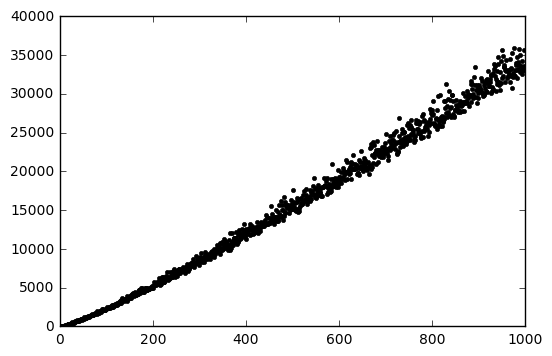

In [25]:
pl.clf()
x = np.arange(1000)
y = np.array(exper_analysis_quick_Sort(1000))
pl.plot(x, y, 'k.')

In [26]:
def tiempo_quickSort(n):
    results = []
    acct = Counter()
    for i in range(n):
        tic= time.clock()
        B = np.random.permutation(range(0,i))
        C= B.tolist()
        acct.reset()
        tamC= len(B)
        acct_quick_sort(C,0,tamC - 1, acct)
        toc= time.clock()
        tiempo= toc-tic
        results.append(tiempo)
    return results

In [27]:
print (tiempo_quickSort(10))

[0.00015800000000076864, 0.00019499999999972317, 5.699999999997374e-05, 5.200000000016303e-05, 4.900000000063187e-05, 5.799999999922534e-05, 9.100000000117348e-05, 0.00013700000000049783, 0.00014200000000030855, 0.00021499999999896602]


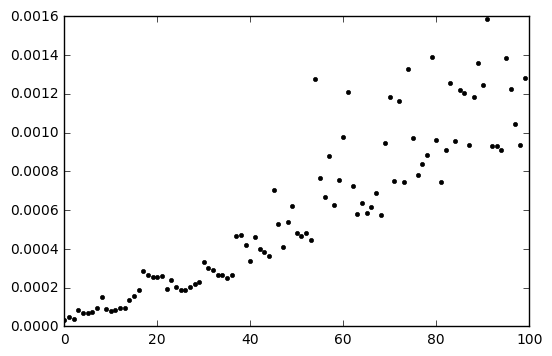

In [28]:
pl.clf()
x = np.arange(100)
y = np.array(tiempo_quickSort(100))
pl.plot(x, y, 'k.')

<p>La proxima grafica muestra los dos algoritmos en comparación con el mergesort y quick sort</p>

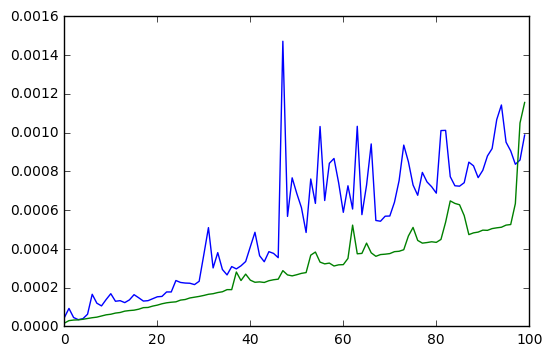

In [29]:
pl.clf()
x = np.arange(100)
y = np.array(tiempo_quickSort(100))
y1 = np.array(tiempo_mergeSort(100))
plt.plot(x, y,  x, y1 )
plt.show()

<p>En la grafica se muestran algunos saltos mas que nada en quick sort por que la partición puede ser insestable pero se ve que empieza a formar una curva de nlogn y merge sort tambien por lo que se ve en la grafica verde que se demora menos </p>